In [39]:
import pandas as pd
import numpy as np
from demoparser2 import DemoParser
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [40]:
demo1 = DemoParser("demos/VS_KREATURES_Anubis.dem")
demo2 = DemoParser("demos/VS_Eldsjalar_Vertigo.dem")
demo3 = DemoParser("demos/VS_MadeInPoland_Mirage.dem")

## Data prep

In [41]:
max_tick = demo1.parse_event("round_end")["tick"].max()

#### Test des différents parsers

In [42]:
player_infos = demo1.parse_player_info()
player_infos

,steamid,name,team_number
0,76561198066661071,OzzieOzz,2
1,76561198173360875,Spiritix,2
2,76561198358546254,MasaIDK_,3
3,76561198111191178,-silentGG,2
4,76561198264064168,JustAnotherL,3
5,76561199198706117,ADEODATUSS,3
6,76561198014090099,fykseN,3
7,76561199074956403,3PARABELLUM,3
8,76561198259827471,godofbaldz,2
9,76561198376612283,BELDIYA00,2


In [43]:
game_events = demo1.list_game_events()
game_events

['player_footstep',
 'decoy_started',
 'flashbang_detonate',
 'bomb_begindefuse',
 'item_pickup',
 'player_jump',
 'begin_new_match',
 'weapon_fire',
 'round_mvp',
 'round_announce_match_start',
 'round_freeze_end',
 'weapon_reload',
 'player_connect',
 'round_prestart',
 'cs_round_final_beep',
 'announce_phase_end',
 'round_announce_last_round_half',
 'hltv_chase',
 'round_time_warning',
 'player_death',
 'round_announce_warmup',
 'round_officially_ended',
 'other_death',
 'player_connect_full',
 'round_announce_final',
 'weapon_zoom',
 'bomb_beginplant',
 'smokegrenade_expired',
 'bomb_planted',
 'server_cvar',
 'decoy_detonate',
 'cs_win_panel_match',
 'buytime_ended',
 'bomb_defused',
 'inferno_startburn',
 'item_equip',
 'player_team',
 'player_hurt',
 'player_blind',
 'inferno_expire',
 'hegrenade_detonate',
 'hltv_fixed',
 'smokegrenade_detonate',
 'round_poststart',
 'bomb_exploded',
 'bomb_pickup',
 'player_disconnect',
 'show_survival_respawn_status',
 'cs_round_start_beep',


In [44]:
event_df = demo1.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])
all_events = demo1.parse_events(["all"])
ticks_df = demo1.parse_ticks(["X", "Y"])
utils = demo1.parse_grenades()

In [45]:
utils

,X,Y,Z,tick,thrower_steamid,name,grenade_type,entity_id
0,-942.46875,-1338.96875,169.15625,5215,76561198066661071,OzzieOzz,smoke,103
1,-944.125,-1329.25,176.96875,5216,76561198066661071,OzzieOzz,smoke,103
2,-945.78125,-1319.53125,184.71875,5217,76561198066661071,OzzieOzz,smoke,103
3,-947.4375,-1309.78125,192.375,5218,76561198066661071,OzzieOzz,smoke,103
4,-949.125,-1300.0625,199.9375,5219,76561198066661071,OzzieOzz,smoke,103
...,...,...,...,...,...,...,...,...
651372,-388.96875,115.374992,-117.96875,237024,76561198066661071,OzzieOzz,smoke,226
651373,-388.96875,115.374992,-117.96875,237025,76561198066661071,OzzieOzz,smoke,226
651374,-388.96875,115.374992,-117.96875,237026,76561198066661071,OzzieOzz,smoke,226
651375,-388.96875,115.374992,-117.96875,237027,76561198066661071,OzzieOzz,smoke,226


In [46]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

In [47]:
ticks_df

,X,Y,tick,steamid,name
0,-400.0,2192.0,0,76561198111191178,-silentGG
1,-240.0,-1696.0,0,76561198264064168,JustAnotherL
2,-476.0,2216.0,0,76561198066661071,OzzieOzz
3,-608.0,2120.0,0,76561198259827471,godofbaldz
4,-192.0,-1608.0,0,76561199198706117,ADEODATUSS
...,...,...,...,...,...
2450495,NaN,NaN,245185,76561198376612283,BELDIYA00
2450496,NaN,NaN,245185,76561198014090099,fykseN
2450497,NaN,NaN,245185,76561198358546254,MasaIDK_
2450498,NaN,NaN,245185,76561198173360875,Spiritix


In [48]:
all_events

[('inferno_expire',
       entityid    tick     user_name       user_steamid            x  \
  0         267    5928      Spiritix  76561198173360875   -43.526894   
  1         140   13115  JustAnotherL  76561198264064168  -788.684204   
  2         965   13578      MasaIDK_  76561198358546254  -948.305420   
  3         183   20098      Spiritix  76561198173360875 -1115.870239   
  4         932   20282      OzzieOzz  76561198066661071 -1527.844727   
  ..        ...     ...           ...                ...          ...   
  141       268  231807      OzzieOzz  76561198066661071  -462.968414   
  142       166  231880   3PARABELLUM  76561199074956403  1347.024536   
  143       374  232538    ADEODATUSS  76561199198706117 -1968.031372   
  144       900  232543      Spiritix  76561198173360875   154.389267   
  145       143  236011     -silentGG  76561198111191178  -923.850891   
  
                 y           z  
  0     602.061218    0.235298  
  1     375.895538  -39.000000  
  

In [49]:
utils

,X,Y,Z,tick,thrower_steamid,name,grenade_type,entity_id
0,-942.46875,-1338.96875,169.15625,5215,76561198066661071,OzzieOzz,smoke,103
1,-944.125,-1329.25,176.96875,5216,76561198066661071,OzzieOzz,smoke,103
2,-945.78125,-1319.53125,184.71875,5217,76561198066661071,OzzieOzz,smoke,103
3,-947.4375,-1309.78125,192.375,5218,76561198066661071,OzzieOzz,smoke,103
4,-949.125,-1300.0625,199.9375,5219,76561198066661071,OzzieOzz,smoke,103
...,...,...,...,...,...,...,...,...
651372,-388.96875,115.374992,-117.96875,237024,76561198066661071,OzzieOzz,smoke,226
651373,-388.96875,115.374992,-117.96875,237025,76561198066661071,OzzieOzz,smoke,226
651374,-388.96875,115.374992,-117.96875,237026,76561198066661071,OzzieOzz,smoke,226
651375,-388.96875,115.374992,-117.96875,237027,76561198066661071,OzzieOzz,smoke,226


#### Initialisation du DF Rounds et Ticks

In [50]:
rounds_ticks = demo1.parse_event('round_start')

In [51]:
rounds_ticks

,round,tick
0,1,0
1,1,2676
2,1,3120
3,1,3237
4,2,9134
5,3,15405
6,4,21740
7,5,26613
8,6,32638
9,7,41072


Isolation des ticks de début de rounds effectifs, sur faceit : 
- R1 = Knife round -> freezetime
- R2 = Warmup -> freezetime
- R3 = RR -> pas de freezetime
- R4 = 1er round

On supprime donc le tick 0 (knife) + le tick 2676 (warmup) + le tick  3120 (RR) pour ne démarrer qu'a partir du tick 3237 qui correspond au vrai premier round IG 


In [52]:
rounds_ticks = rounds_ticks.drop([0,1,2])

In [53]:
first_round_tick = rounds_ticks.loc[3, 'tick']
first_round_tick

3237

#### Freezetime end

In [54]:
freezetime_end_tick = demo1.parse_event("round_freeze_end")["tick"].drop([0,1]).tolist()

In [55]:
freezetime_end_tick

[4933,
 10414,
 18605,
 23020,
 27893,
 33918,
 42352,
 49137,
 58972,
 64869,
 69416,
 78344,
 87128,
 91973,
 99864,
 108801,
 114538,
 123772,
 132108,
 140254,
 147855,
 158095,
 169258,
 180332,
 186975,
 195329,
 203705,
 212989,
 221565,
 230689]

#### Map

In [56]:
map = pd.DataFrame([demo1.parse_header()])
map

,client_name,demo_version_guid,demo_file_stamp,server_name,network_protocol,game_directory,addons,allow_clientside_entities,fullpackets_version,allow_clientside_particles,map_name,demo_version_name
0,SourceTV Demo,8e9d71ab-04a1-4c01-bb61-acfede27c046,PBDEMS2 ,FACEIT.com register to play here,13994,/home/hz00604/cs2/game/csgo,,true,2,true,de_anubis,valve_demo_2


In [57]:
map2 = pd.DataFrame([demo2.parse_header()])
map2

,network_protocol,client_name,server_name,fullpackets_version,allow_clientside_particles,addons,allow_clientside_entities,demo_file_stamp,demo_version_name,demo_version_guid,map_name,game_directory
0,13985,SourceTV Demo,FACEIT.com register to play here,2,true,,true,PBDEMS2 ,valve_demo_2,8e9d71ab-04a1-4c01-bb61-acfede27c046,de_vertigo,/home/hz01872/cs2/game/csgo


#### Bomb plant 

In [58]:
bombsite = demo1.parse_event("bomb_planted", player=["last_place_name"])
bombsite

,site,tick,user_last_place_name,user_name,user_steamid
0,348,6821,BombsiteB,OzzieOzz,76561198066661071
1,348,13675,BombsiteB,OzzieOzz,76561198066661071
2,348,21598,BombsiteB,godofbaldz,76561198259827471
3,236,25321,BombsiteA,OzzieOzz,76561198066661071
4,236,38000,BombsiteA,OzzieOzz,76561198066661071
5,348,54620,BombsiteB,-silentGG,76561198111191178
6,348,61448,BombsiteB,godofbaldz,76561198259827471
7,236,68079,BombsiteA,-silentGG,76561198111191178
8,236,76374,BombsiteA,BELDIYA00,76561198376612283
9,236,84713,BombsiteA,-silentGG,76561198111191178


## Tables intermédiaires

#### Equipe et side

In [59]:
zobrux = ['OzzieOzz','-silentGG','godofbaldz','BELDIYA00','Spiritix']
Equipe = 'zobrux'

Une valeur de Team pour chaque joueur est ajoutée pour chaque changement de side, dans le cas de notre game témoin : 
- tick 3120 : Changement de side suite au Knife round (puis la game est RR donc vrai début de la partie au ticke 3237 mais pas de changement entre ces deux ticks donc pas de lignes supplémentaires)
- tick 85432 : Changement de side mi-temps du match
- tick 211293 : Changement de side Overtime

In [60]:
team_V3 = demo1.parse_ticks(["team_clan_name","team_name"])
team_V3.drop(team_V3[team_V3['tick'] < first_round_tick].index, inplace=True)
team_V3.drop(team_V3[team_V3['tick'] > max_tick].index, inplace=True)
team_V3.rename(columns={'team_name':'side'},inplace=True)

In [61]:
team_V3

,side,team_clan_name,tick,steamid,name
32310,TERRORIST,zobrux,3237,76561198111191178,-silentGG
32311,CT,KREATURES,3237,76561198264064168,JustAnotherL
32312,TERRORIST,zobrux,3237,76561198066661071,OzzieOzz
32313,TERRORIST,zobrux,3237,76561198259827471,godofbaldz
32314,CT,KREATURES,3237,76561199198706117,ADEODATUSS
...,...,...,...,...,...
2359395,TERRORIST,zobrux,236075,76561198376612283,BELDIYA00
2359396,CT,KREATURES,236075,76561198014090099,fykseN
2359397,CT,KREATURES,236075,76561198358546254,MasaIDK_
2359398,TERRORIST,zobrux,236075,76561198173360875,Spiritix


In [62]:
# Créer des dictionnaires pour associer le nom des joueurs à leurs équipes
name_to_team = dict(zip(team_V3['name'], team_V3['team_clan_name']))

In [63]:
# df=pd.DataFrame()
# df['Game_id'] = df.apply(lambda row: row['team_clan_name'] if row['team_clan_name'] != 'zobrux' else team_V3[team_V3['team_clan_name'] != row['team_clan_name']]['team_clan_name'].unique()[0], axis=1)

il semblerait que team 2 = Terrorist et team 3 = CT

#### Table Round winner

In [145]:
round_ends = demo3.parse_event("round_end", other=["total_rounds_played","team_clan_name"])
# round_ends.drop(round_ends[round_ends['tick'] <= first_round_tick].index, inplace=True)
# round_ends.drop(columns={'round'}, inplace=True)

In [146]:
round_ends

,ct_team_clan_name,legacy,message,nomusic,player_count,reason,t_team_clan_name,tick,total_rounds_played,winner
0,zobrux,0,#SFUI_Notice_CTs_Win,0,17,8,Made In Poland,2808,0,3
1,zobrux,0,#SFUI_Notice_Terrorists_Win,0,19,9,Made In Poland,32782,0,2
2,zobrux,0,#SFUI_Notice_Terrorists_Win,0,20,9,Made In Poland,38631,1,2
3,zobrux,0,#SFUI_Notice_Target_Bombed,1,20,1,Made In Poland,44600,2,2
4,zobrux,0,#SFUI_Notice_Bomb_Defused,0,20,7,Made In Poland,50678,3,3
5,zobrux,0,#SFUI_Notice_CTs_Win,0,20,8,Made In Poland,58398,4,3
6,zobrux,0,#SFUI_Notice_CTs_Win,0,20,8,Made In Poland,64015,5,3
7,zobrux,0,#SFUI_Notice_CTs_Win,0,20,8,Made In Poland,69746,6,3
8,zobrux,0,#SFUI_Notice_CTs_Win,0,20,8,Made In Poland,74951,7,3
9,zobrux,0,#SFUI_Notice_Terrorists_Win,0,20,9,Made In Poland,84274,8,2


In [147]:
def transform_round_end(round_ends, first_round_tick):
    # Vérifier si la première colonne est 'legacy'
    if round_ends.columns[1].lower() == 'legacy':
        # Modifier la colonne 'winner' selon les règles spécifiées
        round_ends['winner'] = round_ends['winner'].apply(lambda x: 'T' if x == 2 else 'CT' if x == 3 else 'unknown')

        # Modifier la colonne 'reason' selon les règles spécifiées
        def reason_mapping(x):
            if x == 9:
                return 'ct_killed'
            elif x == 7:
                return 'bomb_defused'
            elif x == 8:
                return 't_killed'
            elif x == 12:
                return 't_saved'
            else:
                return 'unknown'

        round_ends['reason'] = round_ends['reason'].apply(reason_mapping)
        round_ends.drop(round_ends[round_ends['tick'] <= first_round_tick].index, inplace=True)
        round_ends = round_ends[['ct_team_clan_name','t_team_clan_name','reason', 'tick', 'total_rounds_played', 'winner']]
        round_ends['total_rounds_played'] = round_ends['total_rounds_played'] + 1
    
    else:
        round_ends.drop(round_ends[round_ends['tick'] <= first_round_tick].index, inplace=True)
        round_ends.drop(columns=['round'], inplace=True)
    
    return round_ends

round_ends = transform_round_end(round_ends, first_round_tick)


C:\Users\Armel\AppData\Local\Temp\ipykernel_15584\1656658461.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  round_ends['total_rounds_played'] = round_ends['total_rounds_played'] + 1


In [144]:
round_ends

,ct_team_clan_name,t_team_clan_name,reason,tick,total_rounds_played,winner
1,zobrux,Eldsjalar,ct_killed,12040,1,T
2,zobrux,Eldsjalar,ct_killed,18764,2,T
3,zobrux,Eldsjalar,ct_killed,25579,3,T
4,zobrux,Eldsjalar,bomb_defused,34960,4,CT
5,zobrux,Eldsjalar,t_killed,41945,5,CT
6,zobrux,Eldsjalar,t_killed,45588,6,CT
7,zobrux,Eldsjalar,bomb_defused,52792,7,CT
8,zobrux,Eldsjalar,t_killed,57490,8,CT
9,zobrux,Eldsjalar,unknown,67316,9,T
10,zobrux,Eldsjalar,ct_killed,76940,10,T


#### Table kills

In [68]:
kills_df = demo1.parse_event("player_death", player=["X", "Y"], other=["total_rounds_played"])

In [69]:
kills_df.columns

Index(['assistedflash', 'assister_X', 'assister_Y', 'assister_name',
       'assister_steamid', 'attacker_X', 'attacker_Y', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'distance', 'dmg_armor',
       'dmg_health', 'dominated', 'headshot', 'hitgroup', 'noreplay',
       'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick',
       'total_rounds_played', 'user_X', 'user_Y', 'user_name', 'user_steamid',
       'weapon', 'weapon_fauxitemid', 'weapon_itemid',
       'weapon_originalowner_xuid', 'wipe'],
      dtype='object')

In [70]:
kills_df

,assistedflash,assister_X,assister_Y,assister_name,assister_steamid,attacker_X,attacker_Y,attacker_name,attacker_steamid,attackerblind,...,total_rounds_played,user_X,user_Y,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe
0,False,-167.055969,237.575424,Spiritix,76561198173360875,-199.970703,259.122498,OzzieOzz,76561198066661071,False,...,0,-199.327637,210.264328,fykseN,76561198014090099,knife_butterfly,17293822569105523203,35477304051,,0
1,False,-122.406067,180.313324,JustAnotherL,76561198264064168,-90.374817,180.395264,ADEODATUSS,76561199198706117,False,...,0,-100.432251,212.426514,-silentGG,76561198111191178,knife_t,17293822569102704699,0,,0
2,False,-52.514343,267.781067,BELDIYA00,76561198376612283,-50.618103,138.054077,godofbaldz,76561198259827471,False,...,0,-37.088135,106.022820,3PARABELLUM,76561199074956403,knife_skeleton,17293822569103491597,35167355779,,0
3,False,-37.319031,106.022820,3PARABELLUM,76561199074956403,-60.121765,136.473846,ADEODATUSS,76561199198706117,False,...,0,-72.574768,172.412903,BELDIYA00,76561198376612283,knife_t,17293822569102704699,0,,0
4,False,-199.968750,154.260818,MasaIDK_,76561198358546254,-153.121460,136.579834,JustAnotherL,76561198264064168,False,...,0,-101.537781,164.830856,Spiritix,76561198173360875,knife_stiletto,17293822569106571786,34873144654,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,False,NaN,NaN,None,None,-1843.828613,7.268648,godofbaldz,76561198259827471,False,...,29,-1211.707642,998.469543,MasaIDK_,76561198358546254,awp,17293822569116598281,33914766179,,0
205,False,NaN,NaN,None,None,-1903.309448,284.353912,godofbaldz,76561198259827471,False,...,29,-639.289856,701.306396,ADEODATUSS,76561199198706117,awp,17293822569116598281,33914766179,,0
206,False,NaN,NaN,None,None,-1827.925171,112.288429,godofbaldz,76561198259827471,False,...,29,-1188.051514,985.835938,JustAnotherL,76561198264064168,awp,17293822569116598281,33914766179,,0
207,False,NaN,NaN,None,None,-891.219482,320.774597,OzzieOzz,76561198066661071,False,...,29,-971.060059,1109.107056,fykseN,76561198014090099,ak47,17293822569133768711,35297643185,,0


#### Table Eco

In [71]:
eco = demo1.parse_ticks(["current_equip_value", "total_rounds_played"], ticks=freezetime_end_tick)

In [72]:
eco

,total_rounds_played,current_equip_value,tick,steamid,name
0,0,850,4933,76561198111191178,-silentGG
1,0,850,4933,76561198264064168,JustAnotherL
2,0,1150,4933,76561198066661071,OzzieOzz
3,0,850,4933,76561198259827471,godofbaldz
4,0,850,4933,76561199198706117,ADEODATUSS
...,...,...,...,...,...
295,29,5100,230689,76561198376612283,BELDIYA00
296,29,3650,230689,76561198014090099,fykseN
297,29,5500,230689,76561198358546254,MasaIDK_
298,29,5100,230689,76561198173360875,Spiritix


La fonction "total_rounds_played" démarre de 0 a 29 on va y ajouter 1 pour que ça corresponde aux rounds de notre partie

In [73]:
eco['total_rounds_played'] = eco['total_rounds_played'] + 1

la fonction "current_equip_value" compte la valeur du glock (T) et de l'usp (CT) dans la valeur totale il faut donc la supprimer

In [74]:
eco['current_equip_value'] = eco['current_equip_value'] - 200

In [75]:
eco

,total_rounds_played,current_equip_value,tick,steamid,name
0,1,650,4933,76561198111191178,-silentGG
1,1,650,4933,76561198264064168,JustAnotherL
2,1,950,4933,76561198066661071,OzzieOzz
3,1,650,4933,76561198259827471,godofbaldz
4,1,650,4933,76561199198706117,ADEODATUSS
...,...,...,...,...,...
295,30,4900,230689,76561198376612283,BELDIYA00
296,30,3450,230689,76561198014090099,fykseN
297,30,5300,230689,76561198358546254,MasaIDK_
298,30,4900,230689,76561198173360875,Spiritix


On va enrichir avec les notions d'équipe et de side 

In [76]:
eco_by_players = pd.merge(eco,team_V3, on=['tick','name','steamid'])

In [77]:
eco_by_players

,total_rounds_played,current_equip_value,tick,steamid,name,side,team_clan_name
0,1,650,4933,76561198111191178,-silentGG,TERRORIST,zobrux
1,1,650,4933,76561198264064168,JustAnotherL,CT,KREATURES
2,1,950,4933,76561198066661071,OzzieOzz,TERRORIST,zobrux
3,1,650,4933,76561198259827471,godofbaldz,TERRORIST,zobrux
4,1,650,4933,76561199198706117,ADEODATUSS,CT,KREATURES
...,...,...,...,...,...,...,...
295,30,4900,230689,76561198376612283,BELDIYA00,TERRORIST,zobrux
296,30,3450,230689,76561198014090099,fykseN,CT,KREATURES
297,30,5300,230689,76561198358546254,MasaIDK_,CT,KREATURES
298,30,4900,230689,76561198173360875,Spiritix,TERRORIST,zobrux


On va également enrichir a l'aide des notions de round winner et win_reason

In [78]:
eco_by_players = pd.merge_asof(eco_by_players,round_ends[['tick','winner','reason']], on='tick', direction='forward')

In [79]:
eco_by_players

,total_rounds_played,current_equip_value,tick,steamid,name,side,team_clan_name,winner,reason
0,1,650,4933,76561198111191178,-silentGG,TERRORIST,zobrux,CT,bomb_defused
1,1,650,4933,76561198264064168,JustAnotherL,CT,KREATURES,CT,bomb_defused
2,1,950,4933,76561198066661071,OzzieOzz,TERRORIST,zobrux,CT,bomb_defused
3,1,650,4933,76561198259827471,godofbaldz,TERRORIST,zobrux,CT,bomb_defused
4,1,650,4933,76561199198706117,ADEODATUSS,CT,KREATURES,CT,bomb_defused
...,...,...,...,...,...,...,...,...,...
295,30,4900,230689,76561198376612283,BELDIYA00,TERRORIST,zobrux,T,ct_killed
296,30,3450,230689,76561198014090099,fykseN,CT,KREATURES,T,ct_killed
297,30,5300,230689,76561198358546254,MasaIDK_,CT,KREATURES,T,ct_killed
298,30,4900,230689,76561198173360875,Spiritix,TERRORIST,zobrux,T,ct_killed


On va grouper par team pour avoir l'infos également

In [80]:
eco_by_team = eco_by_players.groupby(['total_rounds_played','team_clan_name','tick','side','winner','reason'])['current_equip_value'].sum().reset_index()

In [81]:
eco_by_team.head()

,total_rounds_played,team_clan_name,tick,side,winner,reason,current_equip_value
0,1,KREATURES,4933,CT,CT,bomb_defused,3250
1,1,zobrux,4933,TERRORIST,CT,bomb_defused,3600
2,2,KREATURES,10414,CT,T,ct_killed,19850
3,2,zobrux,10414,TERRORIST,T,ct_killed,15000
4,3,KREATURES,18605,CT,T,ct_killed,7500


### Calculs des KPI

#### Analyse par joueurs

##### Stats kills

In [82]:
kills_df = demo1.parse_event("player_death", other=["total_rounds_played"])
kills_df = kills_df[kills_df['tick'] >= first_round_tick]
kills_df['total_rounds_played'] = kills_df['total_rounds_played'] + 1

In [83]:
# on enrichie avec l'équipe et le side du tueur
kills_df = pd.merge(kills_df,team_V3, left_on=['tick','attacker_name'],right_on=['tick','name'])

In [84]:
kills_df = kills_df.rename(columns={'team_clan_name':'attacker_team_name','side':'attacker_side'})
kills_df = kills_df.drop(columns=['name','steamid'])

In [85]:
# on enrichie avec l'équipe et le side du tué
kills_df = pd.merge(kills_df,team_V3, left_on=['tick','user_name'],right_on=['tick','name'])

In [86]:
kills_df = kills_df.rename(columns={'team_clan_name':'user_team_name','side':'user_side'})
kills_df = kills_df.drop(columns=['name','steamid'])

In [87]:
df_global = kills_df.merge(eco_by_players, left_on=['total_rounds_played','attacker_name'], right_on=['total_rounds_played','name'])

In [88]:
df_global['map'] = demo1.parse_header()['map_name']

In [89]:
df_global.head()

,assistedflash,assister_name,assister_steamid,attacker_name,attacker_steamid,attackerblind,distance,dmg_armor,dmg_health,dominated,...,user_team_name,current_equip_value,tick_y,steamid,name,side,team_clan_name,winner,reason,map
0,False,None,None,JustAnotherL,76561198264064168,False,16.071526,0,124,0,...,zobrux,650,4933,76561198264064168,JustAnotherL,CT,KREATURES,CT,bomb_defused,de_anubis
1,False,JustAnotherL,76561198264064168,MasaIDK_,76561198358546254,False,10.993015,0,129,0,...,zobrux,650,4933,76561198358546254,MasaIDK_,CT,KREATURES,CT,bomb_defused,de_anubis
2,False,None,None,OzzieOzz,76561198066661071,False,17.510454,0,96,0,...,KREATURES,950,4933,76561198066661071,OzzieOzz,TERRORIST,zobrux,CT,bomb_defused,de_anubis
3,False,None,None,BELDIYA00,76561198376612283,False,14.075491,0,101,0,...,KREATURES,650,4933,76561198376612283,BELDIYA00,TERRORIST,zobrux,CT,bomb_defused,de_anubis
4,False,None,None,godofbaldz,76561198259827471,False,5.924605,9,17,0,...,KREATURES,650,4933,76561198259827471,godofbaldz,TERRORIST,zobrux,CT,bomb_defused,de_anubis


In [90]:
df_global.columns

Index(['assistedflash', 'assister_name', 'assister_steamid', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'distance', 'dmg_armor',
       'dmg_health', 'dominated', 'headshot', 'hitgroup', 'noreplay',
       'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick_x',
       'total_rounds_played', 'user_name', 'user_steamid', 'weapon',
       'weapon_fauxitemid', 'weapon_itemid', 'weapon_originalowner_xuid',
       'wipe', 'attacker_side', 'attacker_team_name', 'user_side',
       'user_team_name', 'current_equip_value', 'tick_y', 'steamid', 'name',
       'side', 'team_clan_name', 'winner', 'reason', 'map'],
      dtype='object')

##### Trade

In [91]:
trade = demo1.parse_event("player_death", other=["game_time", "round_start_time",'total_rounds_played'])
trade.drop(trade[trade['tick'] < first_round_tick].index, inplace=True)
trade["player_died_time"] = trade["game_time"] - trade["round_start_time"]
trade

,assistedflash,assister_name,assister_steamid,attacker_name,attacker_steamid,attackerblind,distance,dmg_armor,dmg_health,dominated,...,tick,total_rounds_played,user_name,user_steamid,weapon,weapon_fauxitemid,weapon_itemid,weapon_originalowner_xuid,wipe,player_died_time
8,False,None,None,JustAnotherL,76561198264064168,False,16.071526,0,124,0,...,6171,0,-silentGG,76561198111191178,usp_silencer,17293822569145761853,35034331466,,0,19.328125
9,False,JustAnotherL,76561198264064168,MasaIDK_,76561198358546254,False,10.993015,0,129,0,...,6252,0,Spiritix,76561198173360875,hkp2000,17293822569126101024,13069782900,,0,20.593750
10,False,None,None,OzzieOzz,76561198066661071,False,17.510454,0,96,0,...,6407,0,fykseN,76561198014090099,glock,17293822569142484996,9625445227,,0,23.015625
11,False,None,None,BELDIYA00,76561198376612283,False,14.075491,0,101,0,...,6484,0,JustAnotherL,76561198264064168,glock,17293822569102704644,0,,0,24.218750
12,False,None,None,godofbaldz,76561198259827471,False,5.924605,9,17,0,...,6622,0,MasaIDK_,76561198358546254,glock,17293822569105850372,17635661541,,0,26.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,False,None,None,godofbaldz,76561198259827471,False,29.865206,1,110,0,...,231588,29,MasaIDK_,76561198358546254,awp,17293822569116598281,33914766179,,0,14.031250
205,False,None,None,godofbaldz,76561198259827471,False,33.921307,1,136,0,...,234140,29,ADEODATUSS,76561199198706117,awp,17293822569116598281,33914766179,,0,53.906250
206,False,None,None,godofbaldz,76561198259827471,False,27.526186,1,137,0,...,234390,29,JustAnotherL,76561198264064168,awp,17293822569116598281,33914766179,,0,57.812500
207,False,None,None,OzzieOzz,76561198066661071,False,20.211832,15,108,0,...,235227,29,fykseN,76561198014090099,ak47,17293822569133768711,35297643185,,0,70.890625


In [92]:
trade = demo1.parse_event("player_death", other=["game_time", "round_start_time",'total_rounds_played'])
trade.drop(trade[trade['tick'] < first_round_tick].index, inplace=True)
trade["player_died_time"] = trade["game_time"] - trade["round_start_time"]
trade["total_rounds_played"] = trade["total_rounds_played"] + 1
trade  = pd.merge(trade,team_V3[['team_clan_name','side','name','tick']], left_on=["attacker_name",'tick'], right_on=['name','tick'])
trade = trade.rename(columns={'team_clan_name':'team_clan_name_attacker','side':'side_attacker'})
trade  = pd.merge(trade,team_V3[['team_clan_name','side','name','tick']], left_on=["user_name",'tick'], right_on=['name','tick'])
trade = trade.rename(columns={'team_clan_name':'team_clan_name_user','side':'side_user'})
trade = trade.loc[:, ["total_rounds_played","tick","attacker_name","user_name",'team_clan_name_user',"side_user","player_died_time"]]
trade.head(10)

,total_rounds_played,tick,attacker_name,user_name,team_clan_name_user,side_user,player_died_time
0,1,6171,JustAnotherL,-silentGG,zobrux,TERRORIST,19.328125
1,1,6252,MasaIDK_,Spiritix,zobrux,TERRORIST,20.593750
2,1,6407,OzzieOzz,fykseN,KREATURES,CT,23.015625
3,1,6484,BELDIYA00,JustAnotherL,KREATURES,CT,24.218750
4,1,6622,godofbaldz,MasaIDK_,KREATURES,CT,26.375000
5,1,7119,3PARABELLUM,OzzieOzz,zobrux,TERRORIST,34.140625
6,1,7505,ADEODATUSS,godofbaldz,zobrux,TERRORIST,40.171875
7,1,7808,BELDIYA00,ADEODATUSS,KREATURES,CT,44.906250
8,1,7841,3PARABELLUM,BELDIYA00,zobrux,TERRORIST,45.421875
9,2,12878,Spiritix,ADEODATUSS,KREATURES,CT,38.484375


In [93]:
# Initialiser des dictionnaires pour stocker les Traded Deaths (T) et Trade Kills (T) par joueur
traded_deaths = {}
trade_kills = {}

# Parcourir toutes les lignes du DataFrame pour chercher les morts des terroristes
for i, row in trade.iterrows():
    if row['side_user'] == 'TERRORIST':
        # Extraire les informations de la ligne courante
        terrorist_name = row['user_name']
        attacker_name = row['attacker_name']
        death_time = row['player_died_time']
        round_number = row['total_rounds_played']
        
        # Chercher si l'attaquant (CT) est tué dans les 2 secondes après avoir tué le terroriste
        subsequent_kills = trade[(trade['user_name'] == attacker_name) & 
                                 (trade['player_died_time'] > death_time) & 
                                 (trade['player_died_time'] <= death_time + 2)]
        
        # Si un traded death est trouvé
        if not subsequent_kills.empty:
            # Assurer que la mort de l'attaquant se produit dans le même round que la mort du terroriste
            if all(subsequent_kills['total_rounds_played'] == round_number):
                if terrorist_name not in traded_deaths:
                    traded_deaths[terrorist_name] = {'count': 0, 'rounds': []}
                traded_deaths[terrorist_name]['count'] += 1
                traded_deaths[terrorist_name]['rounds'].append(round_number)

                # Chercher si le trade kill vient d'un coéquipier du terroriste
                for _, sub_kill in subsequent_kills.iterrows():
                    trade_killer = sub_kill['attacker_name']
                    if trade_killer != terrorist_name:
                        if trade_killer not in trade_kills:
                            trade_kills[trade_killer] = {'count': 0, 'rounds': []}
                        trade_kills[trade_killer]['count'] += 1
                        trade_kills[trade_killer]['rounds'].append(round_number)

# Convertir les dictionnaires en DataFrames pour afficher les résultats
traded_deaths_list = [(player, data['count']) for player, data in traded_deaths.items()]
trade_kills_list = [(player, data['count']) for player, data in trade_kills.items()]

traded_deaths_df = pd.DataFrame(traded_deaths_list, columns=['name', 'Traded Deaths (T)'])
trade_kills_df = pd.DataFrame(trade_kills_list, columns=['name', 'Trade Kills (T)'])

# Afficher les résultats
traded_deaths_df


,name,Traded Deaths (T)
0,godofbaldz,2
1,-silentGG,3
2,OzzieOzz,1
3,JustAnotherL,4
4,fykseN,2
5,3PARABELLUM,2
6,MasaIDK_,1
7,ADEODATUSS,1


In [94]:
trade_kills_df 

,name,Trade Kills (T)
0,OzzieOzz,2
1,godofbaldz,1
2,-silentGG,1
3,fykseN,1
4,ADEODATUSS,5
5,JustAnotherL,2
6,MasaIDK_,1
7,3PARABELLUM,1
8,BELDIYA00,2


##### Utils efficency

In [95]:
utils_stats = ["total_rounds_played","utility_damage_total","enemies_flashed_total"]
stats_utils = demo1.parse_ticks(utils_stats, ticks=[max_tick])
stats_utils = stats_utils.rename(columns={"utility_damage_total":"Utility Damages","enemies_flashed_total":"Flashed Ennemies"})
stats_utils = stats_utils.drop(columns={"tick"})
nouvel_ordre_colonnes = [
    'name', 'steamid', "Utility Damages","Flashed Ennemies"
]
stats_utils = stats_utils[nouvel_ordre_colonnes]
stats_utils

,name,steamid,Utility Damages,Flashed Ennemies
0,-silentGG,76561198111191178,175,7
1,JustAnotherL,76561198264064168,106,13
2,OzzieOzz,76561198066661071,75,5
3,godofbaldz,76561198259827471,79,14
4,ADEODATUSS,76561199198706117,34,9
5,BELDIYA00,76561198376612283,257,6
6,fykseN,76561198014090099,163,8
7,MasaIDK_,76561198358546254,85,3
8,Spiritix,76561198173360875,230,2
9,3PARABELLUM,76561199074956403,166,11


Flash assist

In [96]:
flash = demo1.parse_event('player_blind',other=['game_time','round_start_time','total_rounds_played'])
flash['total_rounds_played'] = flash['total_rounds_played'] + 1
flash.drop(flash[flash['tick'] < first_round_tick].index, inplace=True)
flash['blind_start'] = flash['game_time'] - flash['round_start_time']
flash['blind_end'] = flash['blind_start'] + flash['blind_duration']

In [97]:
flash.head()

,attacker_name,attacker_steamid,blind_duration,entityid,game_time,round_start_time,tick,total_rounds_played,user_name,user_steamid,blind_start,blind_end
0,3PARABELLUM,76561199074956403,0.621706,870,546.703125,534.03125,11226,2,3PARABELLUM,76561199074956403,12.671875,13.293581
1,godofbaldz,76561198259827471,0.101258,1015,567.390625,534.03125,12550,2,BELDIYA00,76561198376612283,33.359375,33.460632
2,godofbaldz,76561198259827471,4.749978,1015,567.390625,534.03125,12550,2,OzzieOzz,76561198066661071,33.359375,38.109352
3,godofbaldz,76561198259827471,1.995089,994,578.812500,534.03125,13281,2,godofbaldz,76561198259827471,44.781250,46.776340
4,godofbaldz,76561198259827471,0.987431,994,578.812500,534.03125,13281,2,BELDIYA00,76561198376612283,44.781250,45.768681


In [98]:
trade.head()

,total_rounds_played,tick,attacker_name,user_name,team_clan_name_user,side_user,player_died_time
0,1,6171,JustAnotherL,-silentGG,zobrux,TERRORIST,19.328125
1,1,6252,MasaIDK_,Spiritix,zobrux,TERRORIST,20.593750
2,1,6407,OzzieOzz,fykseN,KREATURES,CT,23.015625
3,1,6484,BELDIYA00,JustAnotherL,KREATURES,CT,24.218750
4,1,6622,godofbaldz,MasaIDK_,KREATURES,CT,26.375000


In [99]:
# Fonction pour vérifier si un joueur était flashé et récupérer le nom du flasheur et les temps de blind
def check_if_flashed_and_get_details(trade_row, flash_df):
    # Filtrer les flashs pour le même joueur et le même round
    flash_events = flash_df[
        (flash_df['user_name'] == trade_row['user_name']) &
        (flash_df['total_rounds_played'] == trade_row['total_rounds_played'])
    ]
    
    # Vérifier si le player_died_time est entre blind_start et blind_end
    for _, flash_row in flash_events.iterrows():
        if flash_row['blind_start'] <= trade_row['player_died_time'] <= flash_row['blind_end']:
            return pd.Series([flash_row['attacker_name'], flash_row['blind_start'], flash_row['blind_end']])
    return pd.Series([None, None, None])  # Retourner None si le joueur n'était pas flashé

# Créer une copie du DataFrame 'trade'
trade_copy_df = trade

# Appliquer la fonction pour obtenir flasher_name, blind_start et blind_end
trade_copy_df[['flasher_name', 'blind_start', 'blind_end']] = trade_copy_df.apply(
    lambda row: check_if_flashed_and_get_details(row, flash), axis=1)

# Ajouter une colonne was_flashed
trade_copy_df['was_flashed'] = trade_copy_df['flasher_name'].notnull()

# Afficher le DataFrame avec les nouvelles colonnes
trade_copy_df.head()


,total_rounds_played,tick,attacker_name,user_name,team_clan_name_user,side_user,player_died_time,flasher_name,blind_start,blind_end,was_flashed
0,1,6171,JustAnotherL,-silentGG,zobrux,TERRORIST,19.328125,None,NaN,NaN,False
1,1,6252,MasaIDK_,Spiritix,zobrux,TERRORIST,20.593750,None,NaN,NaN,False
2,1,6407,OzzieOzz,fykseN,KREATURES,CT,23.015625,None,NaN,NaN,False
3,1,6484,BELDIYA00,JustAnotherL,KREATURES,CT,24.218750,None,NaN,NaN,False
4,1,6622,godofbaldz,MasaIDK_,KREATURES,CT,26.375000,None,NaN,NaN,False


In [100]:
trade_copy_df.loc[trade_copy_df['was_flashed']== True,:]

,total_rounds_played,tick,attacker_name,user_name,team_clan_name_user,side_user,player_died_time,flasher_name,blind_start,blind_end,was_flashed
13,2,14773,MasaIDK_,godofbaldz,zobrux,TERRORIST,68.093750,3PARABELLUM,64.875000,68.929550,True
28,5,29049,Spiritix,MasaIDK_,KREATURES,CT,18.046875,fykseN,14.875000,19.798925,True
42,7,44469,fykseN,-silentGG,zobrux,TERRORIST,33.062500,-silentGG,31.625000,35.140568,True
48,8,51176,JustAnotherL,godofbaldz,zobrux,TERRORIST,31.843750,JustAnotherL,30.593750,33.529041,True
51,9,60808,OzzieOzz,JustAnotherL,KREATURES,CT,28.671875,godofbaldz,25.156250,29.002073,True
52,9,62545,-silentGG,3PARABELLUM,KREATURES,CT,55.812500,MasaIDK_,54.562500,56.215458,True
97,15,107073,ADEODATUSS,godofbaldz,zobrux,CT,112.625000,godofbaldz,109.265625,114.278275,True
121,19,138526,ADEODATUSS,godofbaldz,zobrux,CT,100.265625,ADEODATUSS,98.031250,102.403046,True
134,22,161488,OzzieOzz,fykseN,KREATURES,TERRORIST,53.000000,godofbaldz,52.203125,56.714611,True
184,28,219189,BELDIYA00,fykseN,KREATURES,CT,96.859375,godofbaldz,95.125000,97.154472,True


In [101]:
flash_assist_kill = df_global[df_global['assistedflash'] == True].groupby('assister_name').size().reset_index(name='Flash_assist')
flash_assist_kill= flash_assist_kill.rename(columns={'assister_name':'name'})
flash_assist_kill

,name,Flash_assist
0,ADEODATUSS,1
1,JustAnotherL,1
2,godofbaldz,1


ajouter les flash qui assist des dommages 

In [102]:
all_hits_regs = demo1.parse_event("player_hurt",ticks=[max_tick])
all_hits_regs.drop(all_hits_regs[all_hits_regs['tick'] < first_round_tick].index, inplace=True)
all_hits_regs.drop(all_hits_regs[all_hits_regs['tick'] > max_tick].index, inplace=True)
all_hits_regs['attacker_team'] = all_hits_regs['attacker_name'].map(name_to_team)
all_hits_regs['user_team'] = all_hits_regs['user_name'].map(name_to_team)
all_hits_regs = all_hits_regs[all_hits_regs['attacker_team'] != all_hits_regs['user_team']]
all_hits_regs.loc[(all_hits_regs['attacker_name']=='Spiritix') &  (all_hits_regs['weapon']=='inferno')]

,armor,attacker_name,attacker_steamid,dmg_armor,dmg_health,health,hitgroup,tick,user_name,user_steamid,weapon,attacker_team,user_team
690,100,Spiritix,76561198173360875,0,2,98,0,196323,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
691,100,Spiritix,76561198173360875,0,3,95,0,196336,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
692,100,Spiritix,76561198173360875,0,3,92,0,196349,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
693,100,Spiritix,76561198173360875,0,4,88,0,196361,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
694,100,Spiritix,76561198173360875,0,5,83,0,196374,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
696,95,Spiritix,76561198173360875,0,6,52,0,196387,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
699,85,Spiritix,76561198173360875,0,7,0,0,196400,MasaIDK_,76561198358546254,inferno,zobrux,KREATURES
761,100,Spiritix,76561198173360875,0,4,96,0,214205,fykseN,76561198014090099,inferno,zobrux,KREATURES
762,100,Spiritix,76561198173360875,0,4,92,0,214218,fykseN,76561198014090099,inferno,zobrux,KREATURES
763,100,Spiritix,76561198173360875,0,6,86,0,214231,fykseN,76561198014090099,inferno,zobrux,KREATURES


In [103]:
he_dmg = all_hits_regs[all_hits_regs["weapon"] == "hegrenade"]
he_dmg = he_dmg.groupby('attacker_name').sum('dmg_health').reset_index()
he_dmg = he_dmg.rename(columns={'attacker_name':'name'})
he_dmg

,name,armor,dmg_armor,dmg_health,health,hitgroup,tick
0,-silentGG,349,42,67,329,0,484620
1,3PARABELLUM,370,30,88,401,0,759427
2,ADEODATUSS,71,21,32,41,0,79749
3,BELDIYA00,483,116,183,514,0,923141
4,JustAnotherL,175,25,39,161,0,282093
5,MasaIDK_,598,36,61,549,0,449390
6,OzzieOzz,648,44,73,545,0,822361
7,Spiritix,1074,77,191,1101,0,1802787
8,fykseN,595,94,146,498,0,775230
9,godofbaldz,218,51,79,173,0,415849


In [104]:
molotov_dmg = all_hits_regs[(all_hits_regs["weapon"] == "molotov") | (all_hits_regs["weapon"] == "inferno")]
molotov_dmg = molotov_dmg.groupby('attacker_name').sum('dmg_health').reset_index()
molotov_dmg = molotov_dmg.rename(columns={'attacker_name':'name'})
molotov_dmg

,name,armor,dmg_armor,dmg_health,health,hitgroup,tick
0,-silentGG,1423,0,108,933,0,1578123
1,3PARABELLUM,1520,0,78,1536,0,3325428
2,ADEODATUSS,100,0,2,98,0,232116
3,BELDIYA00,1191,0,74,946,0,1973720
4,JustAnotherL,1100,0,67,772,0,1284555
5,MasaIDK_,900,0,24,853,0,1687219
6,OzzieOzz,99,0,2,97,0,80272
7,Spiritix,980,0,44,782,0,2017184
8,fykseN,500,0,17,437,0,768213


##### Opening duels

In [105]:
# Identifier le premier kill de chaque round
first_duel = trade.groupby('total_rounds_played').first().reset_index()

In [106]:
first_duel

,total_rounds_played,tick,attacker_name,user_name,team_clan_name_user,side_user,player_died_time,flasher_name,blind_start,blind_end,was_flashed
0,1,6171,JustAnotherL,-silentGG,zobrux,TERRORIST,19.328125,None,NaN,NaN,False
1,2,12878,Spiritix,ADEODATUSS,KREATURES,CT,38.484375,3PARABELLUM,64.875000,68.929550,False
2,3,19404,Spiritix,3PARABELLUM,KREATURES,CT,12.468750,None,NaN,NaN,False
3,4,24552,-silentGG,fykseN,KREATURES,CT,23.921875,None,NaN,NaN,False
4,5,28801,MasaIDK_,-silentGG,zobrux,TERRORIST,14.171875,fykseN,14.875000,19.798925,False
5,6,34832,godofbaldz,JustAnotherL,KREATURES,CT,14.265625,None,NaN,NaN,False
6,7,43818,JustAnotherL,godofbaldz,zobrux,TERRORIST,22.890625,-silentGG,31.625000,35.140568,False
7,8,51119,godofbaldz,ADEODATUSS,KREATURES,CT,30.953125,JustAnotherL,30.593750,33.529041,False
8,9,60808,OzzieOzz,JustAnotherL,KREATURES,CT,28.671875,godofbaldz,25.156250,29.002073,True
9,10,66126,BELDIYA00,JustAnotherL,KREATURES,CT,19.625000,None,NaN,NaN,False


In [107]:
# Initialiser un DataFrame pour stocker les résultats par joueur
opening_stats = pd.DataFrame({
    'name': trade['attacker_name'].unique(),
    'entry_attempts(T)': 0,
    'entry_successes(T)': 0,
    'open_attempts(CT)': 0,
    'open_successes(CT)': 0
})

# Parcourir chaque premier kill pour déterminer si c'est une tentative d'entry (T) ou d'open (CT)
for _, row in first_duel.iterrows():
    attacker = row['attacker_name']
    user = row['user_name']
    side_user = row['side_user']

    # Si le joueur tué est un CT, c'est une tentative d'entry pour un Terrorist
    if side_user == 'CT':
        # C'est une tentative d'entry pour l'attaquant
        opening_stats.loc[opening_stats['name'] == attacker, 'entry_attempts(T)'] += 1
        opening_stats.loc[opening_stats['name'] == attacker, 'entry_successes(T)'] += 1
        opening_stats.loc[opening_stats['name'] == user, 'open_attempts(CT)'] += 1


    # Si le joueur tué est un Terroriste, c'est une tentative d'open pour un CT
    elif side_user == 'TERRORIST':
        # C'est une tentative d'open pour l'attaquant
        opening_stats.loc[opening_stats['name'] == attacker, 'open_attempts(CT)'] += 1
        opening_stats.loc[opening_stats['name'] == attacker, 'open_successes(CT)'] += 1
        opening_stats.loc[opening_stats['name'] == user, 'entry_attempts(T)'] += 1

        

# Afficher le résultat
opening_stats


,name,entry_attempts(T),entry_successes(T),open_attempts(CT),open_successes(CT)
0,JustAnotherL,3,1,6,2
1,MasaIDK_,1,1,2,1
2,OzzieOzz,2,1,4,0
3,BELDIYA00,1,1,2,2
4,godofbaldz,6,4,5,3
5,3PARABELLUM,7,3,2,1
6,ADEODATUSS,1,1,2,0
7,Spiritix,3,2,3,1
8,-silentGG,3,1,1,1
9,fykseN,3,2,3,2


In [108]:
opening_stats["%_entry_success(T)"] = round((opening_stats["entry_successes(T)"] / opening_stats["entry_attempts(T)"])*100,0)
opening_stats["%_open_success(CT)"] = round((opening_stats["open_successes(CT)"] / opening_stats["open_attempts(CT)"])*100,0)

In [109]:
column_order=['name','entry_attempts(T)','entry_successes(T)','%_entry_success(T)','open_attempts(CT)','open_successes(CT)','%_open_success(CT)']
opening_stats = opening_stats[column_order]

In [110]:
opening_stats

,name,entry_attempts(T),entry_successes(T),%_entry_success(T),open_attempts(CT),open_successes(CT),%_open_success(CT)
0,JustAnotherL,3,1,33.0,6,2,33.0
1,MasaIDK_,1,1,100.0,2,1,50.0
2,OzzieOzz,2,1,50.0,4,0,0.0
3,BELDIYA00,1,1,100.0,2,2,100.0
4,godofbaldz,6,4,67.0,5,3,60.0
5,3PARABELLUM,7,3,43.0,2,1,50.0
6,ADEODATUSS,1,1,100.0,2,0,0.0
7,Spiritix,3,2,67.0,3,1,33.0
8,-silentGG,3,1,33.0,1,1,100.0
9,fykseN,3,2,67.0,3,2,67.0


##### Clutchs

In [111]:
df_global.columns

Index(['assistedflash', 'assister_name', 'assister_steamid', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'distance', 'dmg_armor',
       'dmg_health', 'dominated', 'headshot', 'hitgroup', 'noreplay',
       'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick_x',
       'total_rounds_played', 'user_name', 'user_steamid', 'weapon',
       'weapon_fauxitemid', 'weapon_itemid', 'weapon_originalowner_xuid',
       'wipe', 'attacker_side', 'attacker_team_name', 'user_side',
       'user_team_name', 'current_equip_value', 'tick_y', 'steamid', 'name',
       'side', 'team_clan_name', 'winner', 'reason', 'map'],
      dtype='object')

In [112]:
df_global[['attacker_name','user_name','tick_x','total_rounds_played']].head(20)

,attacker_name,user_name,tick_x,total_rounds_played
0,JustAnotherL,-silentGG,6171,1
1,MasaIDK_,Spiritix,6252,1
2,OzzieOzz,fykseN,6407,1
3,BELDIYA00,JustAnotherL,6484,1
4,godofbaldz,MasaIDK_,6622,1
5,3PARABELLUM,OzzieOzz,7119,1
6,ADEODATUSS,godofbaldz,7505,1
7,BELDIYA00,ADEODATUSS,7808,1
8,3PARABELLUM,BELDIYA00,7841,1
9,Spiritix,ADEODATUSS,12878,2


In [113]:
# Initialiser un DataFrame pour suivre les clutches
clutch_stats = pd.DataFrame(columns=["player_name", "ct_clutches_attempted", "ct_clutches_won", "t_clutches_attempted", "t_clutches_won"])
clutch_stats.set_index("player_name", inplace=True)

# Fonction pour mettre à jour les statistiques de clutch pour CT ou T
def update_clutch_stats(player_name, team, won):
    if player_name not in clutch_stats.index:
        clutch_stats.loc[player_name] = [0, 0, 0, 0]  # Initialiser avec 0 tentatives et 0 réussites
    
    if team == "CT":
        # Incrémenter les clutchs tentés pour CT
        clutch_stats.loc[player_name, "ct_clutches_attempted"] += 1
        if won:
            clutch_stats.loc[player_name, "ct_clutches_won"] += 1
    elif team == "TERRORIST":
        # Incrémenter les clutchs tentés pour T
        clutch_stats.loc[player_name, "t_clutches_attempted"] += 1
        if won:
            clutch_stats.loc[player_name, "t_clutches_won"] += 1

X = 1

def find_if_1vx(deaths, round_idx, round_ends, df, X):
    # Filtrer les décès correspondant au round actuel
    round_deaths = deaths[deaths["total_rounds_played"] == round_idx]
    
    if round_deaths.empty:
        return None
    
    # Filtrer les ticks du round
    subdf = df[df["tick"].isin(round_deaths["tick"].to_list())]

    # Vérifier que nous avons un vainqueur dans round_ends pour ce round
    round_winner_info = round_ends.loc[round_ends['total_rounds_played'] == round_idx]
    if round_winner_info.empty:
        print(f"No winner info for round {round_idx}, skipping...")
        return None

    # Débogage pour vérifier les informations de vainqueur
    round_winner = round_winner_info["winner"].values[0]
    print(f"Round {round_idx}: Winner is {round_winner}")

    # Suivre les joueurs vivants à chaque étape du round
    for tick in sorted(subdf["tick"].unique()):
        current_tick_df = subdf[subdf["tick"] == tick]
        ct_alive = current_tick_df[(current_tick_df["team_name"] == "CT") & (current_tick_df["is_alive"] == True)]
        t_alive = current_tick_df[(current_tick_df["team_name"] == "TERRORIST") & (current_tick_df["is_alive"] == True)]
        
        # Vérification de la condition 1vX
        if len(ct_alive) == 1 and len(t_alive) == X:
            print(f"Detected 1v{X} situation for CT in round {round_idx}")
            if round_winner == "CT":  # CT a gagné
                print(f"CT won the round in a 1v{X}")
                update_clutch_stats(ct_alive["name"].iloc[0], "CT", won=True)  # CT wins the clutch
                update_clutch_stats(t_alive["name"].iloc[0], "TERRORIST", won=False)  # T loses the clutch
            else:
                print(f"T won the round in a 1v{X}")
                update_clutch_stats(ct_alive["name"].iloc[0], "CT", won=False)  # CT loses the clutch
                update_clutch_stats(t_alive["name"].iloc[0], "TERRORIST", won=True)  # T wins the clutch
        elif len(t_alive) == 1 and len(ct_alive) == X:
            print(f"Detected 1v{X} situation for TERRORIST in round {round_idx}")
            if round_winner == "T":  # T a gagné
                print(f"T won the round in a 1v{X}")
                update_clutch_stats(t_alive["name"].iloc[0], "TERRORIST", won=True)  # T wins the clutch
                update_clutch_stats(ct_alive["name"].iloc[0], "CT", won=False)  # CT loses the clutch
            else:
                print(f"CT won the round in a 1v{X}")
                update_clutch_stats(t_alive["name"].iloc[0], "TERRORIST", won=False)  # T loses the clutch
                update_clutch_stats(ct_alive["name"].iloc[0], "CT", won=True)  # CT wins the clutch

# Chargement des événements avec la nouvelle colonne 'total_rounds_played'
deaths = demo1.parse_event("player_death", other=["total_rounds_played"])
deaths['total_rounds_played'] = deaths['total_rounds_played'] + 1
deaths.drop(deaths[deaths['tick'] <= first_round_tick].index, inplace=True)

round_ends = demo1.parse_event("round_end", other=["total_rounds_played"])
round_ends.drop(round_ends[round_ends['tick'] <= first_round_tick].index, inplace=True)

# Réinitialiser les indices de 'round_ends'
round_ends = round_ends.reset_index(drop=True)

df = demo1.parse_ticks(["is_alive", "team_name", "team_rounds_total"], ticks=deaths["tick"].to_list())
max_round = deaths["total_rounds_played"].max() + 1

# Parcourir tous les rounds
for round_idx in range(1, max_round):
    print(f"Checking for 1v{X} in round {round_idx}")
    clutcher_steamid = find_if_1vx(deaths, round_idx, round_ends, df, X)
    if clutcher_steamid is not None:
        print(f"Round: {round_idx} {clutcher_steamid} clutched a 1v{X}")

# Afficher le DataFrame final des statistiques de cl

Checking for 1v1 in round 1
Round 1: Winner is CT
Detected 1v1 situation for CT in round 1
CT won the round in a 1v1
Checking for 1v1 in round 2
Round 2: Winner is T
Checking for 1v1 in round 3
Round 3: Winner is T
Checking for 1v1 in round 4
Round 4: Winner is T
Checking for 1v1 in round 5
Round 5: Winner is CT
Checking for 1v1 in round 6
Round 6: Winner is T
Checking for 1v1 in round 7
Round 7: Winner is CT
Detected 1v1 situation for CT in round 7
CT won the round in a 1v1
Checking for 1v1 in round 8
Round 8: Winner is T
Checking for 1v1 in round 9
Round 9: Winner is T
Checking for 1v1 in round 10
Round 10: Winner is T
Checking for 1v1 in round 11
Round 11: Winner is T
Detected 1v1 situation for CT in round 11
T won the round in a 1v1
Checking for 1v1 in round 12
Round 12: Winner is T
Checking for 1v1 in round 13
Round 13: Winner is T
Checking for 1v1 in round 14
Round 14: Winner is T
Checking for 1v1 in round 15
Round 15: Winner is T
Checking for 1v1 in round 16
Round 16: Winner is 

In [114]:
clutch_stats

,ct_clutches_attempted,ct_clutches_won,t_clutches_attempted,t_clutches_won
player_name,,,,
3PARABELLUM,2,1,0,0
BELDIYA00,0,0,3,2
ADEODATUSS,2,1,0,0
Spiritix,0,0,1,0
JustAnotherL,1,0,0,0
OzzieOzz,0,0,1,1


#### Score d'eco

In [115]:
df_global.columns

Index(['assistedflash', 'assister_name', 'assister_steamid', 'attacker_name',
       'attacker_steamid', 'attackerblind', 'distance', 'dmg_armor',
       'dmg_health', 'dominated', 'headshot', 'hitgroup', 'noreplay',
       'noscope', 'penetrated', 'revenge', 'thrusmoke', 'tick_x',
       'total_rounds_played', 'user_name', 'user_steamid', 'weapon',
       'weapon_fauxitemid', 'weapon_itemid', 'weapon_originalowner_xuid',
       'wipe', 'attacker_side', 'attacker_team_name', 'user_side',
       'user_team_name', 'current_equip_value', 'tick_y', 'steamid', 'name',
       'side', 'team_clan_name', 'winner', 'reason', 'map'],
      dtype='object')

In [116]:
#ANTI X KILLS EN FONCTION DE LA MONNAIE DE L'ADVERSAIRE'

# Fusionner les DataFrames sur les colonnes 'user_steamid' et 'steamid' et 'total_rounds_played'
df_merged = pd.merge(kills_df, eco_by_players, how='left', left_on=['attacker_name', 'total_rounds_played'], right_on=['name', 'total_rounds_played'])

# Filtrer les rounds 1 et 13 (pistol rounds) en les incluant dans une nouvelle catégorie
def categorize_kill(row):
    if row['total_rounds_played'] in [1, 13]:
        return 'pistol round'
    elif row['current_equip_value'] < 1000:
        return 'eco'
    elif row['current_equip_value'] < 3500:
        return 'force buy'
    else:
        return 'full buy'

# Appliquer la fonction de catégorisation
df_merged['kill_category'] = df_merged.apply(categorize_kill, axis=1)

# Utilisation de pivot_table pour compter les kills par catégorie et par joueur
pivot_df = df_merged.pivot_table(index='attacker_name', columns='kill_category', aggfunc='size', fill_value=0)

# Afficher le résultat
pivot_df

kill_category,eco,force buy,full buy,pistol round
attacker_name,,,,
-silentGG,1,2,14,0
3PARABELLUM,0,3,11,5
ADEODATUSS,0,1,21,2
BELDIYA00,0,1,24,2
JustAnotherL,1,0,13,1
MasaIDK_,1,5,12,1
OzzieOzz,1,3,14,1
Spiritix,0,1,17,0
fykseN,2,2,12,1


In [117]:
#X KILLS EN FONCTION DE LA MONNAIE DE L'ADVERSAIRE'

# Fusionner les DataFrames sur les colonnes 'user_steamid' et 'steamid' et 'total_rounds_played'
df_merged = pd.merge(kills_df, eco_by_players, how='left', left_on=['user_name', 'total_rounds_played'], right_on=['name', 'total_rounds_played'])

# Filtrer les rounds 1 et 13 (pistol rounds) en les incluant dans une nouvelle catégorie
def categorize_kill(row):
    if row['total_rounds_played'] in [1, 13]:
        return 'pistol round'
    elif row['current_equip_value'] < 1000:
        return 'eco'
    elif row['current_equip_value'] < 3500:
        return 'force buy'
    else:
        return 'full buy'

# Appliquer la fonction de catégorisation
df_merged['kill_category'] = df_merged.apply(categorize_kill, axis=1)

# Utilisation de pivot_table pour compter les kills par catégorie et par joueur
pivot_df = df_merged.pivot_table(index='attacker_name', columns='kill_category', aggfunc='size', fill_value=0)

# Afficher le résultat
pivot_df

kill_category,eco,force buy,full buy,pistol round
attacker_name,,,,
-silentGG,1,3,13,0
3PARABELLUM,2,3,9,5
ADEODATUSS,3,0,19,2
BELDIYA00,4,2,19,2
JustAnotherL,0,2,12,1
MasaIDK_,5,2,11,1
OzzieOzz,3,3,12,1
Spiritix,2,8,8,0
fykseN,1,1,14,1


In [118]:
# Fusionner les données de kills avec l'économie totale de l'équipe de l'attaquant
df_merged_team = pd.merge(kills_df, eco_by_team, how='left', left_on=['total_rounds_played', 'user_team_name'], right_on=['total_rounds_played', 'team_clan_name'])

# Filtrer les rounds 1 et 13 (pistol rounds) en les incluant dans une nouvelle catégorie
def categorize_kill(row):
    if row['total_rounds_played'] in [1, 13]:
        return 'Pistol round'
    elif row['current_equip_value'] <= 3500:
        return 'Anti eco kill'
    elif row['current_equip_value'] <= 18000:
        return 'Anti force buy kill'
    else:
        return 'Full buy kill'

# Appliquer la fonction de catégorisation
df_merged_team['kill_category'] = df_merged_team.apply(categorize_kill, axis=1)

# Utilisation de pivot_table pour compter les kills par catégorie et par joueur
team_eco_kills = df_merged_team.pivot_table(index='attacker_name', columns='kill_category', aggfunc='size', fill_value=0)

# Afficher le résultat
team_eco_kills

kill_category,Anti eco kill,Anti force buy kill,Full buy kill,Pistol round
attacker_name,,,,
-silentGG,1,2,14,0
3PARABELLUM,3,2,9,5
ADEODATUSS,1,2,19,2
BELDIYA00,3,4,18,2
JustAnotherL,0,2,12,1
MasaIDK_,5,1,12,1
OzzieOzz,2,1,15,1
Spiritix,1,8,9,0
fykseN,1,0,15,1


In [119]:
df_merged_team

,assistedflash,assister_name,assister_steamid,attacker_name,attacker_steamid,attackerblind,distance,dmg_armor,dmg_health,dominated,...,attacker_team_name,user_side,user_team_name,team_clan_name,tick_y,side,winner,reason,current_equip_value,kill_category
0,False,None,None,JustAnotherL,76561198264064168,False,16.071526,0,124,0,...,KREATURES,TERRORIST,zobrux,zobrux,4933,TERRORIST,CT,bomb_defused,3600,Pistol round
1,False,JustAnotherL,76561198264064168,MasaIDK_,76561198358546254,False,10.993015,0,129,0,...,KREATURES,TERRORIST,zobrux,zobrux,4933,TERRORIST,CT,bomb_defused,3600,Pistol round
2,False,None,None,OzzieOzz,76561198066661071,False,17.510454,0,96,0,...,zobrux,CT,KREATURES,KREATURES,4933,CT,CT,bomb_defused,3250,Pistol round
3,False,None,None,BELDIYA00,76561198376612283,False,14.075491,0,101,0,...,zobrux,CT,KREATURES,KREATURES,4933,CT,CT,bomb_defused,3250,Pistol round
4,False,None,None,godofbaldz,76561198259827471,False,5.924605,9,17,0,...,zobrux,CT,KREATURES,KREATURES,4933,CT,CT,bomb_defused,3250,Pistol round
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,False,None,None,godofbaldz,76561198259827471,False,29.865206,1,110,0,...,zobrux,CT,KREATURES,KREATURES,230689,CT,T,ct_killed,22550,Full buy kill
197,False,None,None,godofbaldz,76561198259827471,False,33.921307,1,136,0,...,zobrux,CT,KREATURES,KREATURES,230689,CT,T,ct_killed,22550,Full buy kill
198,False,None,None,godofbaldz,76561198259827471,False,27.526186,1,137,0,...,zobrux,CT,KREATURES,KREATURES,230689,CT,T,ct_killed,22550,Full buy kill
199,False,None,None,OzzieOzz,76561198066661071,False,20.211832,15,108,0,...,zobrux,CT,KREATURES,KREATURES,230689,CT,T,ct_killed,22550,Full buy kill


In [120]:
# Fusionner les données de kills avec l'économie totale de l'équipe de l'attaquant
df_merged_team = pd.merge(kills_df, eco_by_team, how='left', left_on=['total_rounds_played', 'attacker_team_name'], right_on=['total_rounds_played', 'team_clan_name'])

# Filtrer les rounds 1 et 13 (pistol rounds) en les incluant dans une nouvelle catégorie
def categorize_kill(row):
    if row['total_rounds_played'] in [1, 13]:
        return 'Pistol round'
    elif row['current_equip_value'] <= 3500:
        return 'Eco kill'
    elif row['current_equip_value'] <= 18000:
        return 'Force buy kill'
    else:
        return 'Full buy kill'

# Appliquer la fonction de catégorisation
df_merged_team['kill_category'] = df_merged_team.apply(categorize_kill, axis=1)

# Utilisation de pivot_table pour compter les kills par catégorie et par joueur
pivot_df_team = df_merged_team.pivot_table(index='attacker_name', columns='kill_category', aggfunc='size', fill_value=0)

# Afficher le résultat
pivot_df_team

kill_category,Eco kill,Force buy kill,Full buy kill,Pistol round
attacker_name,,,,
-silentGG,1,1,15,0
3PARABELLUM,0,3,11,5
ADEODATUSS,0,5,17,2
BELDIYA00,1,0,24,2
JustAnotherL,0,1,13,1
MasaIDK_,0,1,17,1
OzzieOzz,1,3,14,1
Spiritix,0,1,17,0
fykseN,1,3,12,1


#### Scoreboard

In [121]:
overall_stats = ["total_rounds_played","kills_total","assists_total","deaths_total", "mvps", "headshot_kills_total","3k_rounds_total", "4k_rounds_total", "ace_rounds_total" ,"damage_total","utility_damage_total","enemies_flashed_total","alive_time_total"]

stats = demo1.parse_ticks(overall_stats, ticks=[max_tick])
stats['ADR'] = round(stats['damage_total'] / stats["total_rounds_played"],2)
stats['HS %'] = round((stats['headshot_kills_total'] / stats['kills_total'])*100,2)
stats['KPR'] = round((stats['kills_total'] / stats['total_rounds_played']), 2)
stats['K/D'] = round((stats['kills_total'] / stats['deaths_total']),2)
stats = stats.rename(columns={"headshot_kills_total":"HS","kills_total":"Kills","assists_total":"Assists","deaths_total":"Deaths","3k_rounds_total":'3K', "4k_rounds_total":'4K', "ace_rounds_total":'5K',"damage_total":"Damages","utility_damage_total":"Utility Damages","enemies_flashed_total":"Flashed Ennemies"})
stats = stats.drop(columns={"tick"})
nouvel_ordre_colonnes = [
    'name', 'steamid', 'total_rounds_played', 'Kills', 'Deaths', 'Assists', 
    'K/D', 'Damages', 'ADR', 'KPR', 'HS', 'HS %', '5K', '4K', '3K', 'mvps', 'alive_time_total'
]
stats = stats[nouvel_ordre_colonnes]

In [122]:
stats

,name,steamid,total_rounds_played,Kills,Deaths,Assists,K/D,Damages,ADR,KPR,HS,HS %,5K,4K,3K,mvps,alive_time_total
0,-silentGG,76561198111191178,30,17,21,6,0.81,2001,66.70,0.57,8,47.06,0,0,1,3,1333
1,JustAnotherL,76561198264064168,30,15,23,7,0.65,1933,64.43,0.50,10,66.67,0,0,1,3,1307
2,OzzieOzz,76561198066661071,30,19,19,4,1.00,1892,63.07,0.63,9,47.37,0,1,1,4,1250
3,godofbaldz,76561198259827471,30,26,18,4,1.44,2469,82.30,0.87,3,11.54,0,0,3,3,1155
4,ADEODATUSS,76561199198706117,30,24,18,2,1.33,2089,69.63,0.80,15,62.50,0,0,1,3,1155
5,BELDIYA00,76561198376612283,30,27,17,8,1.59,3213,107.10,0.90,15,55.56,0,1,2,4,1222
6,fykseN,76561198014090099,30,17,20,2,0.85,2010,67.00,0.57,7,41.18,0,0,1,1,1207
7,MasaIDK_,76561198358546254,30,19,24,8,0.79,2333,77.77,0.63,9,47.37,0,1,0,3,1395
8,Spiritix,76561198173360875,30,18,19,8,0.95,2000,66.67,0.60,7,38.89,0,0,2,2,1116
9,3PARABELLUM,76561199074956403,30,19,22,7,0.86,2530,84.33,0.63,9,47.37,0,0,3,4,1495


## TABLE FINALE

#### Players stats

In [123]:
joueurs = pd.DataFrame()
joueurs['name']  = team_V3.loc[(team_V3['team_clan_name'] == 'zobrux') & (team_V3['tick'] == first_round_tick), 'name']

In [124]:
Stats_joueurs = joueurs.merge(stats, on='name', how='left')

In [125]:
Stats_joueurs

,name,steamid,total_rounds_played,Kills,Deaths,Assists,K/D,Damages,ADR,KPR,HS,HS %,5K,4K,3K,mvps,alive_time_total
0,-silentGG,76561198111191178,30,17,21,6,0.81,2001,66.70,0.57,8,47.06,0,0,1,3,1333
1,OzzieOzz,76561198066661071,30,19,19,4,1.00,1892,63.07,0.63,9,47.37,0,1,1,4,1250
2,godofbaldz,76561198259827471,30,26,18,4,1.44,2469,82.30,0.87,3,11.54,0,0,3,3,1155
3,BELDIYA00,76561198376612283,30,27,17,8,1.59,3213,107.10,0.90,15,55.56,0,1,2,4,1222
4,Spiritix,76561198173360875,30,18,19,8,0.95,2000,66.67,0.60,7,38.89,0,0,2,2,1116


In [126]:
Utils_joueurs = joueurs.merge(he_dmg[['name','dmg_health']],on='name',how='left').fillna(0)
Utils_joueurs = Utils_joueurs.merge(molotov_dmg[['name','dmg_health']],on='name',how='left').fillna(0)
Utils_joueurs = Utils_joueurs.rename(columns={'dmg_health_x':'He_dmg','dmg_health_y':'Fire_dmg'})
Utils_joueurs['Total_utility_dmg'] = Utils_joueurs['He_dmg'] + Utils_joueurs['Fire_dmg']
Utils_joueurs = Utils_joueurs.merge(stats_utils[['name','Flashed Ennemies']], on='name', how='left')
Utils_joueurs = Utils_joueurs.merge(flash_assist_kill, on='name', how='left')
Utils_joueurs[['Flash_assist','He_dmg','Fire_dmg','Total_utility_dmg']] = Utils_joueurs[['Flash_assist','He_dmg','Fire_dmg','Total_utility_dmg']].fillna(0).astype(int)

In [127]:
Utils_joueurs

,name,He_dmg,Fire_dmg,Total_utility_dmg,Flashed Ennemies,Flash_assist
0,-silentGG,67,108,175,7,0
1,OzzieOzz,73,2,75,5,0
2,godofbaldz,79,0,79,14,1
3,BELDIYA00,183,74,257,6,0
4,Spiritix,191,44,235,2,0


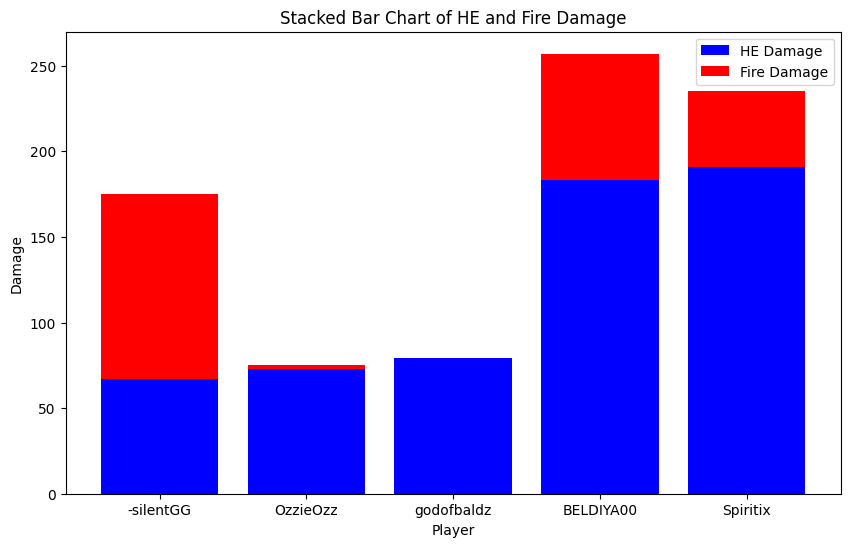

In [128]:
# Créer le stacked bar chart
plt.figure(figsize=(10,6))
plt.bar(Utils_joueurs['name'], Utils_joueurs['He_dmg'], label='HE Damage', color='blue')
plt.bar(Utils_joueurs['name'], Utils_joueurs['Fire_dmg'], bottom=Utils_joueurs['He_dmg'], label='Fire Damage', color='red')

# Ajouter des labels et une légende
plt.xlabel('Player')
plt.ylabel('Damage')
plt.title('Stacked Bar Chart of HE and Fire Damage')
plt.legend()

# Afficher le graphique
plt.show()

In [129]:
teamplay_stats = joueurs.merge(opening_stats,on='name',how='left')

In [130]:
teamplay_stats

,name,entry_attempts(T),entry_successes(T),%_entry_success(T),open_attempts(CT),open_successes(CT),%_open_success(CT)
0,-silentGG,3,1,33.0,1,1,100.0
1,OzzieOzz,2,1,50.0,4,0,0.0
2,godofbaldz,6,4,67.0,5,3,60.0
3,BELDIYA00,1,1,100.0,2,2,100.0
4,Spiritix,3,2,67.0,3,1,33.0


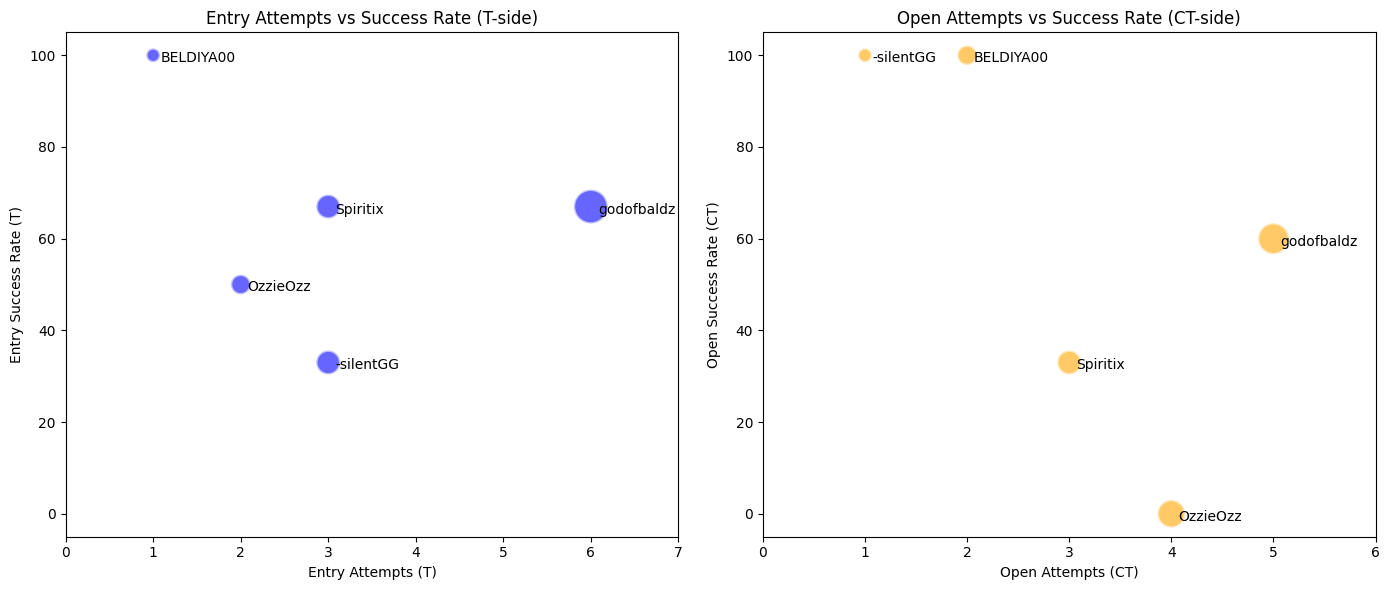

In [131]:
# Créer une figure avec deux sous-graphiques pour scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot pour T-side (entry attempts vs % success)
scatter1 = ax1.scatter(teamplay_stats['entry_attempts(T)'], teamplay_stats['%_entry_success(T)'], s=teamplay_stats['entry_attempts(T)']*100, c='blue', alpha=0.6, edgecolors='w', linewidth=2)

# Ajouter des labels
for i, txt in enumerate(teamplay_stats['name']):
    ax1.annotate(txt, (teamplay_stats['entry_attempts(T)'][i], teamplay_stats['%_entry_success(T)'][i]), xytext=(5, -5), textcoords='offset points')

ax1.set_xlabel('Entry Attempts (T)')
ax1.set_ylabel('Entry Success Rate (T)')
ax1.set_title('Entry Attempts vs Success Rate (T-side)')
ax1.set_xlim(0, max(teamplay_stats['entry_attempts(T)']) + 1)
ax1.set_ylim(-5, 105)

# Scatter plot pour CT-side (open attempts vs % success)
scatter2 = ax2.scatter(teamplay_stats['open_attempts(CT)'], teamplay_stats['%_open_success(CT)'], s=teamplay_stats['open_attempts(CT)']*100, c='orange', alpha=0.6, edgecolors='w', linewidth=2)

# Ajouter des labels
for i, txt in enumerate(teamplay_stats['name']):
    ax2.annotate(txt, (teamplay_stats['open_attempts(CT)'][i], teamplay_stats['%_open_success(CT)'][i]), xytext=(5, -5), textcoords='offset points')

ax2.set_xlabel('Open Attempts (CT)')
ax2.set_ylabel('Open Success Rate (CT)')
ax2.set_title('Open Attempts vs Success Rate (CT-side)')
ax2.set_xlim(0, max(teamplay_stats['open_attempts(CT)']) + 1)
ax2.set_ylim(-5, 105)

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

In [132]:
teamplay_stats = teamplay_stats.merge(trade_kills_df, on='name',how='left')
teamplay_stats['Trade Kills (T)'] = teamplay_stats['Trade Kills (T)'].fillna(0).astype(int)
teamplay_stats = teamplay_stats.merge(traded_deaths_df, on='name',how='left')
teamplay_stats['Traded Deaths (T)'] = teamplay_stats['Traded Deaths (T)'].fillna(0).astype(int)

In [133]:
teamplay_stats

,name,entry_attempts(T),entry_successes(T),%_entry_success(T),open_attempts(CT),open_successes(CT),%_open_success(CT),Trade Kills (T),Traded Deaths (T)
0,-silentGG,3,1,33.0,1,1,100.0,1,3
1,OzzieOzz,2,1,50.0,4,0,0.0,2,1
2,godofbaldz,6,4,67.0,5,3,60.0,1,2
3,BELDIYA00,1,1,100.0,2,2,100.0,2,0
4,Spiritix,3,2,67.0,3,1,33.0,0,0


In [134]:
eco_stats = pd.merge(joueurs,team_eco_kills,left_on='name',right_on='attacker_name',how='left')

In [135]:
eco_stats

,name,Anti eco kill,Anti force buy kill,Full buy kill,Pistol round
0,-silentGG,1,2,14,0
1,OzzieOzz,2,1,15,1
2,godofbaldz,3,2,19,2
3,BELDIYA00,3,4,18,2
4,Spiritix,1,8,9,0


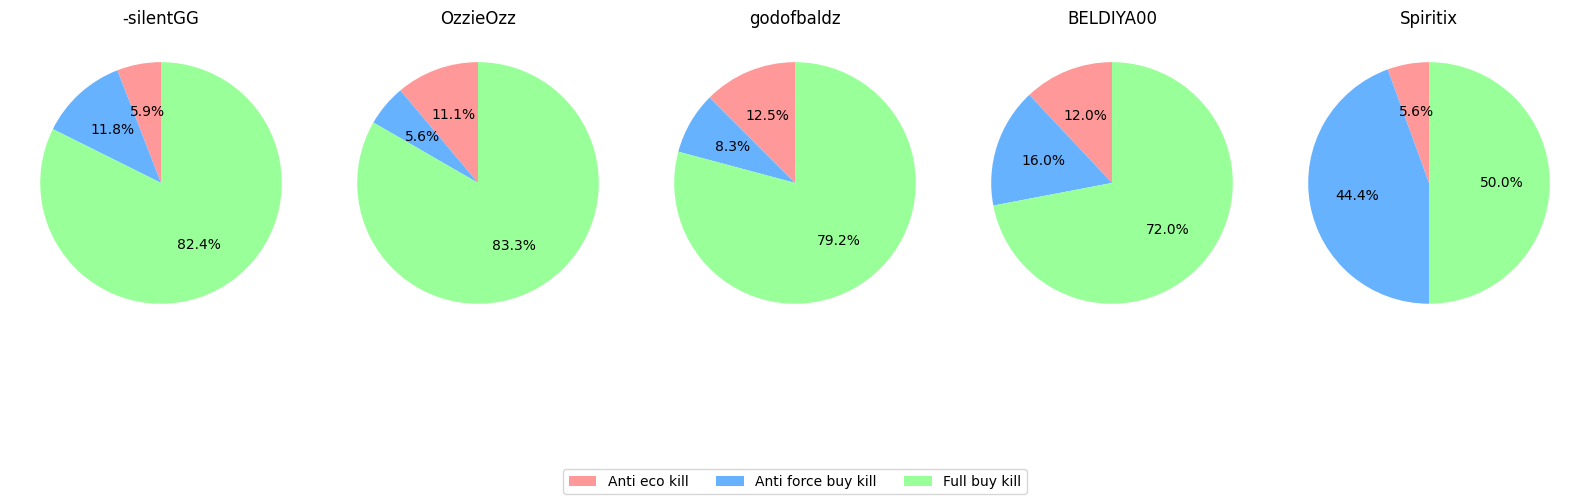

In [136]:
# Créer une figure pour les pie charts
fig, axes = plt.subplots(1, len(eco_stats), figsize=(16, 6))

# Définir les labels et couleurs pour la légende
labels = ['Anti eco kill', 'Anti force buy kill', 'Full buy kill']
colors = ['#FF9999', '#66B2FF', '#99FF99']

# Boucle pour créer un pie chart pour chaque joueur sans les pistol rounds et sans légende dans les graphiques
for i, ax in enumerate(axes):
    # Sélectionner uniquement les colonnes Anti eco, Anti force buy, Full buy (exclure les pistol rounds)
    player_data = eco_stats.iloc[i, 1:-1]  # On exclut la dernière colonne (Pistol round)
    ax.pie(player_data, autopct='%1.1f%%', startangle=90, colors=colors)
    ax.set_title(eco_stats['name'][i])

# Ajouter une légende en bas de la figure
fig.legend(labels=labels, loc='lower center', ncol=3)

# Ajuster l'espacement entre les sous-graphes
plt.tight_layout(rect=[0, 0.1, 1, 0.95])  # Ajuster pour laisser de la place à la légende

# Afficher les pie charts
plt.show()